# Calculando Módulo de Young em Grafeno

* PET - Física UFRN
* Petiano: José Arthur de Luna Oliveira
* Data: 

## Pré-requisitos

$\quad$ Para o usuário acompanhar os códigos feitos neste Notebook é necessário ter o `LAMMPS` e o `VMD` instalado no computador. Logo abaixo estão listados os links para fazer o download dos programas:

* [LAMMPS](https://docs.lammps.org/Install.html);

* [VMD](https://www.ks.uiuc.edu/Development/Download/download.cgi?PackageName=VMD).

Além disso, recomendo que o leitor já tenha lido o `Notebook` _Deformando Nanotubo De Carbono_ [1], onde já foi explicado como usar algumas ferramentas do `VMD` que precisaremos usar neste trabalho.

## 1. O Módulo de Young

$\quad$ Antes de criarmos o arquivo input, devemos saber o que é o módulo de Young e como determinamos essa propriedade. O módulo de Young é uma das propriedades mecânicas mais importantes para entendermos o comportamento elástico do material. Esta mede a rigidez de um material, em outras palavras, a capacidade do material deformar em uma dimensão e retornar à sua forma original [2, 3].

$\quad$ O módulo de Young é encontrado pela relação da tensão ou stress ($\sigma$) causado no material pela deformação ($\epsilon$) feita, essa como definida abaixo:

$$ E = \frac{\sigma}{\epsilon} \ ,$$

onde $E$ é o módulo de Young. Os outros termos devem ser determinados também, o stress é definido como está descrito abaixo

$$ \sigma = \frac{F}{A} \ ,$$

em que $F$ é a força que está deformando o material e $A$ é a área da seção transversal do material. Já a deformação deve ser determinada da seguinte forma

$$\epsilon = \frac{\Delta L}{L_0} \ ,$$

o qual $\Delta L$ é a variação do comprimento do material (esse comprimento é referente a dimensão que a deformação foi aplicada) e $L_0$ é o tamanho inicial do corpo. Esses dados de deformação e stress o arquivo input usando alguns comandos podemos te-las. 

## 2. Preparativos antes de montar o input

$\quad$ Agora após uma breve explicação sobre o módulo de Young, devemos montar o arquivo input da nossa simulação. De maneira geral, a simulação de Dinâmica Molecular terá que deformar a lâmina de grafeno em uma dimensão. E para aplicar essa deformação, aumentaremos o tamanho da caixa do sistema para deformarmos o grafeno, a caixa deve possuir paredes periódicas. Para fazermos isso, explicaremos primeiramente como funciona a caixa da simulação em Dinâmica Molecular (MD).

## 2.1 Caixa do sistema

$\quad$ Basicamente, a caixa é onde estarão todos os átomos da simulação. No entanto, em MD, em cada lado da caixa, é como se houvesse outra espelhada. Imagine num espaço com vários átomos e dividimos esse espaço em várias caixas, em que cada uma delas possua os mesmos átomos, mesma quantidade para cada átomo, além de que as partículas se moveram da mesma maneira em todas as caixas. De maneira que teremos agora diversos sistemas atômicos, todos iguais [4]. Vale salientar que isso apenas ocorre quando configuramos as paredes da nossa simulação como periódicas. Podemos ver o que foi dito acima, na figura abaixo.

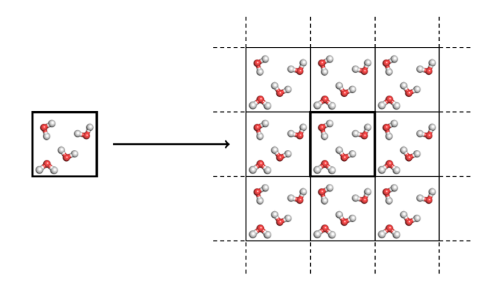

$\quad$ Se a caixa tiver extremidades periódicas, e um átomo sair do sistema pela extremidade direita, outro átomo entra no sistema pela esquerda. Em outras palavras, o nosso sistema não perderá átomos, além disso, átomos de um sistema podem interagir com os dos outros, colidindo, se acoplando, entre outros. E essa interação é importante para a nossa simulação.

$\quad$ Imagine que uma lâmina de grafeno está numa caixa, a qual as suas dimensões no eixo $x$ e $y$ têm quase o mesmo tamanho que os grafeno, de maneira que o grafeno consiga fazer ligações com os outros grafenos dos outros sistemas. Em outras palavras, teremos um grafeno “infinito”, com essa configuração, se alterarmos as dimensões da caixa, também alteraremos a estrutura da mesma forma. Assim, se esticarmos a caixa da simulação no eixo $x$, o grafeno também será esticado nesse eixo.

## 2.2 Gerando a estrutura

$\quad$ Uma das coisas que devem ser feitas antes de montarmos o input é gerar a estrutura para simulação. Para isso, usaremos o programa `VMD`, inicie o programa e, quando isso acontecer, abrirão três janelas: uma do prompt do `VMD`, uma será o display, nessa é possível observar a estrutura gerada, e a outra chamada `VMD main`, nela conseguimos criar, ler e salvar arquivos. 

$\quad$ Na janela `VMD main` siga o seguinte procedimento: vá em `Extensions` $\rightarrow$ `Modeling` $\rightarrow$ `Nanotube Builder`. Feito isso, abrirá uma nova janela do `VMD`, nesta conseguimos gerar a lâmina de grafeno. Para a nossa simulação, criaremos um grafeno com tamanho de $5 \ nm$ no eixo $x$ e $10 \ nm$ no eixo $y$. Após isso, no display, poderá ver a estrutura gerada, como na imagem abaixo.

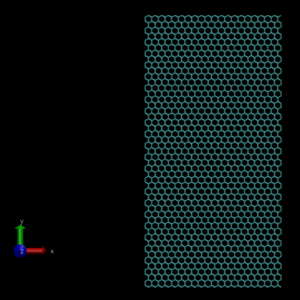

$\quad$ Feito isso, definiremos agora o tamanho da caixa. Com esse objetivo, no programa `VMD` faça o seguinte procedimento: vá `Extensions` $\rightarrow$ `Tk Console`. Em seguida, uma nova janela será aberta, no `Tk Console` é onde definiremos o tamanho da caixa, rodando as seguintes linhas de comando: `pbc box -center com` e depois `pbc set {51.3 101.3 10}`. A primeira linha de comando permite que visualizemos os limites da caixa no display, e a outra defini o tamanho da caixa em cada eixo de coordenada, $x$, $y$ e $z$, respectivamente.

$\quad$ Note que a caixa possui quase as mesmas dimensões da nossa lâmina de grafeno, o valor a mais que foi colocado é para haver distância suficiente dos outros grafenos, a fim que interajam e façam ligações mutuamente, e tenhamos um grafeno “infinito”. Caso a caixa tenha as mesmas dimensões que o grafeno, a interação de repulsão com os outros sistemas será muito forte e o grafeno provavelmente irá explodir, então é necessário haver este espaçamento. Além disso, note que no eixo $z$ colocamos uma distância maior, de forma que o grafeno fique isolado dos sistemas de cima e de baixo. Pomos de forma, pois, caso tivesse distância para ter interação, então estaríamos analisando uma estrutura de grafeno com várias camadas, e neste trabalho estamos interessados em encontrar o módulo de Young do grafeno em monocamada.

$\quad$ Em seguida, feito tudo isso, agora geremos um arquivo da estrutura, para isso vá no prompt do `VMD`, usando o comando `cd` ponha na pasta que queria salvar, e utilizando a seguinte linha de comando `topo writelammpsdata data.grafeno charge`, este será o arquivo que o nosso input lerá para saber as posições dos átomos de carbono do nosso sistema.

## 3. Montando o input

$\quad$ Após todos os preparativos começaremos a montar o arquivo input.

## Referências

**[1]** OLIVEIRA, J. A. de L. Deformando Nanotubo De Carbono. GitHub. PET - Física, 2023. Disponível em: <https://github.com/PETfisicaUFRN/PET.py/blob/main/Notebooks/Deformando%20nanotubo%20de%20carbono.ipynb>. Acesso em: 29/jun./24.

**[2]** COSTA, M. Da. Módulo De Elasticidade Ou Módulo De Young. Biopdi. 2023. Disponível em: <https://biopdi.com.br/artigos/modulo-de-elasticidade-ou-modulo-de-young/>. Acesso em: jun./29DC.

**[3]** DARAEE, M.; HASSANI, S.; AZAR, S. An Overview of Determination of Young’s modulus by AFM in Various Fields. [s.l.]: [s.n.], [s.d.]. Acesso em: 29/jun./24.

**[4]** RAPAPORT, D. C. The Art of Molecular Dynamics Simulation. [s.l.]: Cambridge University Press, 2004.

**[5]** THOMPSON, A. et al. LAMMPS - a Flexible Simulation Tool for particle-based Materials Modeling at the atomic, meso, and Continuum Scales. Computer Physics Communications, [s.l.], 2022. DOI: https://doi.org/10.1016/j.cpc.2021.108171.